In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
data = load_wine()
target = load_wine().target
df = pd.DataFrame(data.data, columns=data.feature_names)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [3]:
data.data.shape # change activation function to leaky relu

(178, 13)

In [4]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(),
            nn.Linear(128, encoding_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.LeakyReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_dim = df.shape[1]
encoding_dim = 2
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
num_epochs = 5000 # 5000
batch_size = 16

dataset = torch.tensor(df_scaled, dtype=torch.float32)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [6]:
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    for data in dataloader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    # Average the loss over all batches for the epoch
    avg_epoch_loss = epoch_loss / len(dataloader)
    losses.append(avg_epoch_loss)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}")


Epoch 1/5000, Loss: 0.9947
Epoch 1001/5000, Loss: 0.1836
Epoch 2001/5000, Loss: 0.1473
Epoch 3001/5000, Loss: 0.1354
Epoch 4001/5000, Loss: 0.1301


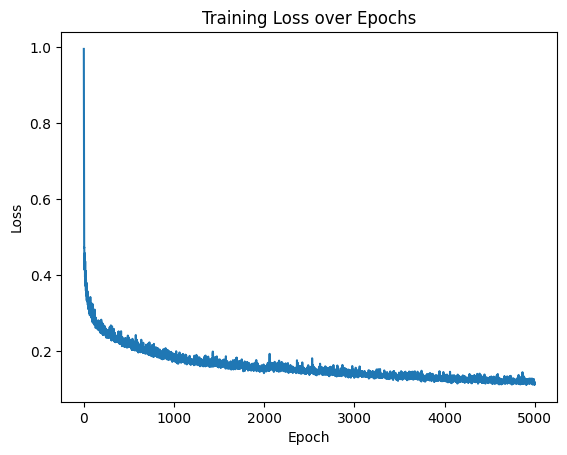

In [7]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

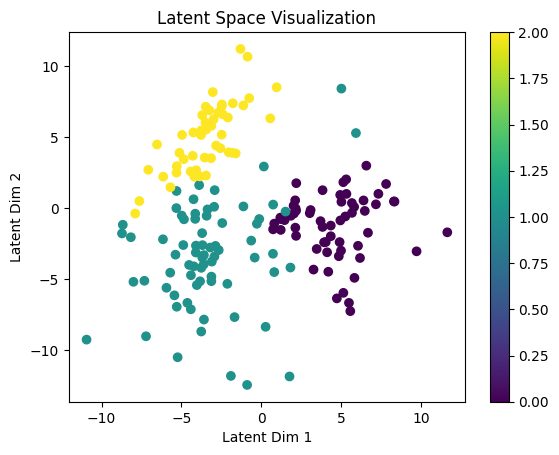

In [8]:
with torch.no_grad():
    encoded_data = model.encoder(torch.tensor(df_scaled, dtype=torch.float32)).numpy()
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=target)  # Note the change here
    plt.colorbar()
    plt.xlabel('Latent Dim 1')
    plt.ylabel('Latent Dim 2')
    plt.title('Latent Space Visualization')
    plt.show()
